In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['FangSong']  # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False



In [47]:
#读入重仓股票相关数据
fund_data = pd.read_excel('基金相关数据.xlsx',index_col=0)
fund_data.head()

,名称,重仓股股票Wind代码 [报告期]2020-03-31 [名次]第1名,重仓股股票Wind代码 [报告期]2020-06-30 [名次]第1名,重仓股股票Wind代码 [报告期]2020-09-30 [名次]第1名,重仓股股票Wind代码 [报告期]2020-12-31 [名次]第1名,重仓股股票Wind代码 [报告期]2020-03-31 [名次]第2名,重仓股股票Wind代码 [报告期]2020-06-30 [名次]第2名,重仓股股票Wind代码 [报告期]2020-09-30 [名次]第2名,重仓股股票Wind代码 [报告期]2020-12-31 [名次]第2名,重仓股股票Wind代码 [报告期]2020-03-31 [名次]第3名,...,重仓股票持有基金数 [报告期]2020-12-31 [名次]第3名,重仓股票持有基金数 [报告期]2020-12-31 [名次]第4名,重仓股票持有基金数 [报告期]2020-12-31 [名次]第5名,重仓股涨跌幅 [报告期]2020-12-31 [名次]第1名 [起始交易日期]2020-11-01 [截止交易日期]2020-12-31,重仓股涨跌幅 [报告期]2020-12-31 [名次]第2名 [起始交易日期]2020-11-01 [截止交易日期]2020-12-31,重仓股涨跌幅 [报告期]2020-12-31 [名次]第3名 [起始交易日期]2020-11-01 [截止交易日期]2020-12-31,重仓股涨跌幅 [报告期]2020-12-31 [名次]第4名 [起始交易日期]2020-11-01 [截止交易日期]2020-12-31,重仓股涨跌幅 [报告期]2020-12-31 [名次]第5名 [起始交易日期]2020-11-01 [截止交易日期]2020-12-31,平均持仓时间 [年度]2020,平均持仓时间同类排名 [年度]2020 [基金分类]开放式/封闭式
代码,,,,,,,,,,,,,,,,,,,,,
Code,Name,prt_topstockwindcode,prt_topstockwindcode,prt_topstockwindcode,prt_topstockwindcode,prt_topstockwindcode,prt_topstockwindcode,prt_topstockwindcode,prt_topstockwindcode,prt_topstockwindcode,...,prt_fundnoofstocks,prt_fundnoofstocks,prt_fundnoofstocks,prt_heavilyheldstocksperchange,prt_heavilyheldstocksperchange,prt_heavilyheldstocksperchange,prt_heavilyheldstocksperchange,prt_heavilyheldstocksperchange,style_averagepositiontime,style_avgpositiontimeranking
000008.OF,嘉实中证500ETF联接A,600745.SH,002821.SZ,600008.SH,603605.SH,300253.SZ,300253.SZ,601966.SH,002500.SZ,002463.SZ,...,8,1,53,2.82479,19.1744,2.32338,55.3672,-9.40989,0.0130596,97.0233
000042.OF,财通中证100指数增强A,002142.SZ,601328.SH,600519.SH,601633.SH,601398.SH,601988.SH,000333.SZ,002142.SZ,601633.SH,...,582,1667,36,59.4013,4.00235,17.2472,19.6393,86.6972,0.244094,81.7826
000051.OF,华夏沪深300ETF联接A,601318.SH,601318.SH,601318.SH,600030.SH,000651.SZ,600519.SH,600519.SH,600519.SH,000333.SZ,...,1277,1326,1060,2.68949,19.6393,11.7564,19.4393,26.4158,0.852148,38.4079
000059.OF,国联安中证医药100A,600276.SH,300759.SZ,603882.SH,603882.SH,002603.SZ,300347.SZ,300759.SZ,603259.SH,002223.SZ,...,757,54,457,21.6252,19.5174,25.4615,4.69565,19.8628,2.73168,7.92652


In [48]:
#原始数据包含了从20年季度重仓的数据，处理只保留20年三季和年度的重仓情况
selected_col_list = [3,4,7,8,11,12,15,16,19,20]
selected_col_list.extend(list(range(21,33)))
fund_simpled_data = fund_data.iloc[:,selected_col_list]

In [49]:
fund_simpled_data = fund_simpled_data.drop("Code",axis=0)
fund_simpled_data.head()


,重仓股股票Wind代码 [报告期]2020-09-30 [名次]第1名,重仓股股票Wind代码 [报告期]2020-12-31 [名次]第1名,重仓股股票Wind代码 [报告期]2020-09-30 [名次]第2名,重仓股股票Wind代码 [报告期]2020-12-31 [名次]第2名,重仓股股票Wind代码 [报告期]2020-09-30 [名次]第3名,重仓股股票Wind代码 [报告期]2020-12-31 [名次]第3名,重仓股股票Wind代码 [报告期]2020-9-30 [名次]第4名,重仓股股票Wind代码 [报告期]2020-12-31 [名次]第4名,重仓股股票Wind代码 [报告期]2020-09-30 [名次]第5名,重仓股股票Wind代码 [报告期]2020-12-31 [名次]第5名,...,重仓股票持有基金数 [报告期]2020-12-31 [名次]第3名,重仓股票持有基金数 [报告期]2020-12-31 [名次]第4名,重仓股票持有基金数 [报告期]2020-12-31 [名次]第5名,重仓股涨跌幅 [报告期]2020-12-31 [名次]第1名 [起始交易日期]2020-11-01 [截止交易日期]2020-12-31,重仓股涨跌幅 [报告期]2020-12-31 [名次]第2名 [起始交易日期]2020-11-01 [截止交易日期]2020-12-31,重仓股涨跌幅 [报告期]2020-12-31 [名次]第3名 [起始交易日期]2020-11-01 [截止交易日期]2020-12-31,重仓股涨跌幅 [报告期]2020-12-31 [名次]第4名 [起始交易日期]2020-11-01 [截止交易日期]2020-12-31,重仓股涨跌幅 [报告期]2020-12-31 [名次]第5名 [起始交易日期]2020-11-01 [截止交易日期]2020-12-31,平均持仓时间 [年度]2020,平均持仓时间同类排名 [年度]2020 [基金分类]开放式/封闭式
代码,,,,,,,,,,,,,,,,,,,,,
000008.OF,600008.SH,603605.SH,601966.SH,002500.SZ,605336.SH,603737.SH,605358.SH,002670.SZ,605136.SH,603444.SH,...,8,1,53,2.82479,19.1744,2.32338,55.3672,-9.40989,0.0130596,97.0233
000042.OF,600519.SH,601633.SH,000333.SZ,002142.SZ,000858.SZ,601166.SH,601633.SH,600519.SH,000157.SZ,601919.SH,...,582,1667,36,59.4013,4.00235,17.2472,19.6393,86.6972,0.244094,81.7826
000051.OF,601318.SH,600030.SH,600519.SH,600519.SH,000858.SZ,601318.SH,000333.SZ,000858.SZ,002475.SZ,000333.SZ,...,1277,1326,1060,2.68949,19.6393,11.7564,19.4393,26.4158,0.852148,38.4079
000059.OF,603882.SH,603882.SH,300759.SZ,603259.SH,300347.SZ,600276.SH,603259.SH,300759.SZ,300015.SZ,000661.SZ,...,757,54,457,21.6252,19.5174,25.4615,4.69565,19.8628,2.73168,7.92652
000082.OF,600036.SH,601318.SH,002475.SZ,600036.SH,601318.SH,600519.SH,601336.SH,601336.SH,600519.SH,002475.SZ,...,1667,80,784,11.7564,10.3994,19.6393,-9.70405,2.29676,0.819658,39.9728


In [50]:
#去除掉有空值的情况，并去掉投资为港股的基金
fund_simpled_data.dropna(inplace=True)
final_fund_simpled_data = fund_simpled_data[~fund_simpled_data[fund_simpled_data.columns[0]].str.endswith('HK')]

In [51]:
final_fund_simpled_data.shape


(1361, 22)

###初步的数据分析

c:\users\92306\.pyenv\pyenv-win\versions\3.7.4-amd64\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


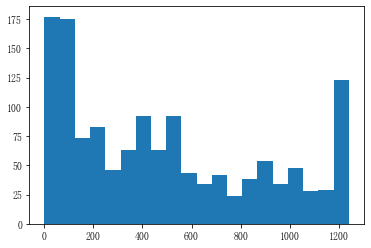

In [52]:
#分析重仓股票持有基金数的分布
#建立新列，统计基金前五只重仓股票的平均持有基金数
final_fund_simpled_data['重仓股票平均持仓基金数'] = final_fund_simpled_data.iloc[:,list(range(10,15))].mean(axis=1)
final_fund_simpled_data['重仓股票平均持仓基金数'].hist(grid=False,bins=20)

In [53]:
final_fund_simpled_data['重仓股票平均持仓基金数'].describe()

count    1361.000000
mean      493.936664
std       396.273359
min         1.200000
25%       124.600000
50%       420.400000
75%       820.200000
max      1239.400000
Name: 重仓股票平均持仓基金数, dtype: float64

In [54]:
#统计基金前五只重仓股票的平均持有基金数不同分位数的情况，便于后面的评分标准的设立
np.percentile(final_fund_simpled_data['重仓股票平均持仓基金数'],np.arange(0,100,20))

array([  1.2,  98.4, 299.6, 507.2, 910. ])

c:\users\92306\.pyenv\pyenv-win\versions\3.7.4-amd64\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


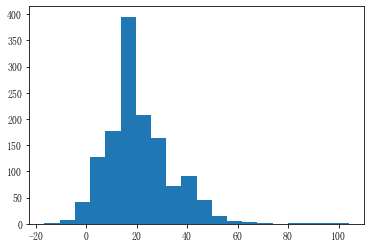

In [55]:
#重仓股票在过去两个月的涨跌幅
final_fund_simpled_data['重仓股票平均涨跌幅'] = final_fund_simpled_data.iloc[:,list(range(15,20))].mean(axis=1)
final_fund_simpled_data['重仓股票平均涨跌幅'].hist(grid=False,bins=20)

In [56]:
final_fund_simpled_data['重仓股票平均涨跌幅'].describe()


count    1361.000000
mean       21.063924
std        13.011598
min       -16.562691
25%        13.352128
50%        18.734480
75%        28.191042
max       104.061373
Name: 重仓股票平均涨跌幅, dtype: float64

In [57]:
#统计基金前五只重仓股票的平均涨跌幅不同分位数的情况，便于后面的评分标准的设立
np.percentile(final_fund_simpled_data['重仓股票平均涨跌幅'],np.arange(0,100,20))



array([-16.56269076,  11.41972663,  17.5024325 ,  20.90311037,
        30.06018697])

In [58]:
final_fund_simpled_data.head()

,重仓股股票Wind代码 [报告期]2020-09-30 [名次]第1名,重仓股股票Wind代码 [报告期]2020-12-31 [名次]第1名,重仓股股票Wind代码 [报告期]2020-09-30 [名次]第2名,重仓股股票Wind代码 [报告期]2020-12-31 [名次]第2名,重仓股股票Wind代码 [报告期]2020-09-30 [名次]第3名,重仓股股票Wind代码 [报告期]2020-12-31 [名次]第3名,重仓股股票Wind代码 [报告期]2020-9-30 [名次]第4名,重仓股股票Wind代码 [报告期]2020-12-31 [名次]第4名,重仓股股票Wind代码 [报告期]2020-09-30 [名次]第5名,重仓股股票Wind代码 [报告期]2020-12-31 [名次]第5名,...,重仓股票持有基金数 [报告期]2020-12-31 [名次]第5名,重仓股涨跌幅 [报告期]2020-12-31 [名次]第1名 [起始交易日期]2020-11-01 [截止交易日期]2020-12-31,重仓股涨跌幅 [报告期]2020-12-31 [名次]第2名 [起始交易日期]2020-11-01 [截止交易日期]2020-12-31,重仓股涨跌幅 [报告期]2020-12-31 [名次]第3名 [起始交易日期]2020-11-01 [截止交易日期]2020-12-31,重仓股涨跌幅 [报告期]2020-12-31 [名次]第4名 [起始交易日期]2020-11-01 [截止交易日期]2020-12-31,重仓股涨跌幅 [报告期]2020-12-31 [名次]第5名 [起始交易日期]2020-11-01 [截止交易日期]2020-12-31,平均持仓时间 [年度]2020,平均持仓时间同类排名 [年度]2020 [基金分类]开放式/封闭式,重仓股票平均持仓基金数,重仓股票平均涨跌幅
代码,,,,,,,,,,,,,,,,,,,,,
000008.OF,600008.SH,603605.SH,601966.SH,002500.SZ,605336.SH,603737.SH,605358.SH,002670.SZ,605136.SH,603444.SH,...,53,2.82479,19.1744,2.32338,55.3672,-9.40989,0.0130596,97.0233,17.8,14.055991
000042.OF,600519.SH,601633.SH,000333.SZ,002142.SZ,000858.SZ,601166.SH,601633.SH,600519.SH,000157.SZ,601919.SH,...,36,59.4013,4.00235,17.2472,19.6393,86.6972,0.244094,81.7826,544.2,37.397486
000051.OF,601318.SH,600030.SH,600519.SH,600519.SH,000858.SZ,601318.SH,000333.SZ,000858.SZ,002475.SZ,000333.SZ,...,1060,2.68949,19.6393,11.7564,19.4393,26.4158,0.852148,38.4079,1119.6,15.988063
000059.OF,603882.SH,603882.SH,300759.SZ,603259.SH,300347.SZ,600276.SH,603259.SH,300759.SZ,300015.SZ,000661.SZ,...,457,21.6252,19.5174,25.4615,4.69565,19.8628,2.73168,7.92652,378.2,18.232503
000082.OF,600036.SH,601318.SH,002475.SZ,600036.SH,601318.SH,600519.SH,601336.SH,601336.SH,600519.SH,002475.SZ,...,784,11.7564,10.3994,19.6393,-9.70405,2.29676,0.819658,39.9728,935.0,6.877556


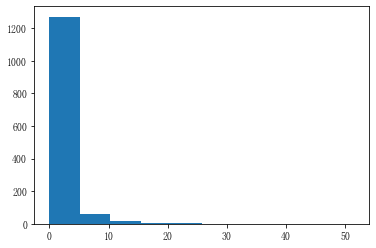

In [62]:
#基金平均持仓时间的分布
final_fund_simpled_data[final_fund_simpled_data.columns[-4]].hist(grid=False,bins=10)

In [63]:
final_fund_simpled_data[final_fund_simpled_data.columns[-4]].describe()

count     1361.0
unique     976.0
top          0.0
freq        86.0
Name: 平均持仓时间\n[年度]2020, dtype: float64

In [64]:
np.percentile(final_fund_simpled_data[final_fund_simpled_data.columns[-4]],np.arange(0,100,20))

array([0.0, 0.2013570459481305, 0.5073716062043004, 1.0115915833441453,
       2.2198719887950893], dtype=object)

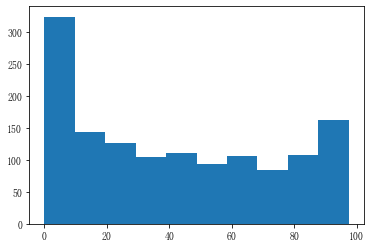

In [65]:
#基金平均持仓时间同业排名的分布
final_fund_simpled_data[final_fund_simpled_data.columns[-3]].hist(grid=False,bins=10)


In [66]:
final_fund_simpled_data[final_fund_simpled_data.columns[-3]].describe()

count     1361.0
unique     976.0
top          0.0
freq        86.0
Name: 平均持仓时间同类排名\n[年度]2020\n[基金分类]开放式/封闭式, dtype: float64

In [67]:
np.percentile(final_fund_simpled_data[final_fund_simpled_data.columns[-3]],np.arange(0,100,20))



array([0.0, 7.416227249532233, 25.05528151046096, 49.396155808811024,
       77.87038612008845], dtype=object)

In [68]:
final_fund_simpled_data.to_excel("cleaned_data.xlsx")